In [22]:
##importar bibliotecas
from sklearn import tree            #Para a árvore de decisão
import pandas as pd                 #Para o DataSet
import pydotplus                    # Para criar o gráfico de árvore de decisão
from IPython.display import Image   # Para exibir uma imagem do gráfico
import glob                         #carregar dataset
from google.colab import files      #carregar arquivo dataset
from sklearn.model_selection import train_test_split

In [23]:
uploaded = files.upload()
for fn in uploaded.keys():            
 """ print('Arquivo enviado pelo usuário "{name}" com comprimento {length} bytes '.format(name=fn, length=len(uploaded[fn])))
extension = 'csv'"""
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


Saving Tcaixas.csv to Tcaixas.csv


In [24]:
#combinar todos os arquivos na lista
combined_csv = pd.concat([pd.read_csv(f, sep=';') for f in all_filenames ])
#combined_csv


In [25]:
'''Converte variáveis categóricas em variáveis dummy / indicadores ou (variáveis binárias) 
essencialmente 1 e 0. one-hot é um grupo de bits entre os quais as combinações legais de
valores são apenas aquelas com um único bit alto (1) e todas as outras baixas (0)'''
one_hot_data = pd.get_dummies (combined_csv[['volume']])
#imprimir os novos dados fictícios
X= one_hot_data
y = combined_csv[['Saida']]

In [26]:
# O classificador da árvore de decisão.
clf = tree.DecisionTreeClassifier(random_state=0)
clf1 = tree.DecisionTreeClassifier(random_state=0)
# Treinando a árvore de decisão
#clf_train = clf.fit(one_hot_data, combined_csv['Saida'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf_train = clf.fit(X_train,  y_train)
clf_test = clf1.fit(X_test,  y_test)


digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 1000.5\ngini = 0.666530612244898\nsamples = 70\nvalue = [23, 24, 23]"] ;
1 [label="gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 26388.5\ngini = 0.4997736532367587\nsamples = 47\nvalue = [23, 24, 0]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 23\nvalue = [23, 0, 0]"] ;
2 -> 4 ;
}


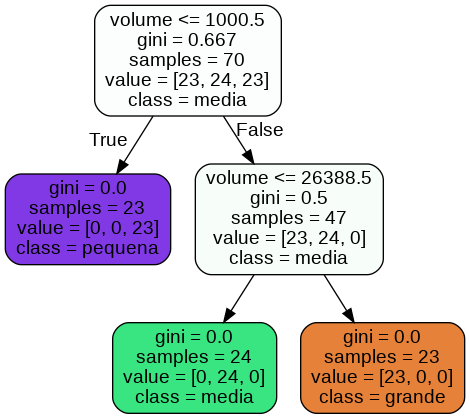

In [72]:
# Exportar / Imprimir uma árvore de decisão no formato DOT.
print(tree.export_graphviz(clf_train,precision=20))
 
#Criar dados de ponto
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values),class_names=['grande', 'media', 'pequena'], rounded=True, filled=True) 
#Gini decide qual atributo / recurso deve ser colocado no nó raiz, quais recursos atuarão como nós internos ou nós folha
#Criar gráfico a partir de dados do DOT
graph = pydotplus.graph_from_dot_data(dot_data)
# Mostrar gráfico
Image(graph.create_png())

In [74]:
 #para clf_test = pequena<1377, 1377<media<26399, grande>26400
 #para clf_train = pequena<1000, 1000<media<26389, grande>26390

prediction = clf_train.predict([[1000]])
prediction

array(['pequena'], dtype=object)